Optimizing Memory and Resource Usage in Student Job Training Dataset.

This data science project centers around optimizing memory and resource utilization while analyzing a sizable database containing anonymized student information. The dataset encompasses various attributes about students, including their backgrounds, educational qualifications, work experiences, and whether they were actively seeking new job opportunities during their training.

Two primary questions are at the forefront of this project:

Memory Optimization: The dataset being substantial requires careful handling to maximize efficiency and reduce memory footprint during data processing, exploration, and modeling. Strategies involving efficient data structures, sampling techniques, and appropriate data types are explored to minimize memory usage without compromising analytical capabilities.

Resource Efficiency: Alongside memory optimization, the project delves into resource-efficient methodologies, considering computational resources such as CPU usage and processing time. Advanced algorithms, optimized functions, and parallel processing techniques are evaluated to streamline computational efficiency and speed up analytical tasks.

The overarching goal is to strike a balance between comprehensive analysis and resource-friendly operations. By implementing effective memory management and resource-efficient strategies, this project aims to enable robust analysis of student job-seeking behavior during training while optimizing computational resources.

In [11]:
import pandas as pd

# Create the dataframe from the .csv file
ds_jobs = pd.read_csv('customer_train.csv')

# Display data types of each column and total memory usage
print(ds_jobs.info())

# Display the first 5 records of the dataset
desired_width=320
pd.set_option('display.width', desired_width)
print(ds_jobs.head())



   student_id      city  city_development_index gender      relevant_experience enrolled_university education_level major_discipline experience company_size    company_type last_new_job  training_hours  job_change
0        8949  city_103                   0.920   Male  Has relevant experience       no_enrollment        Graduate             STEM        >20          NaN             NaN            1              36           1
1       29725   city_40                   0.776   Male   No relevant experience       no_enrollment        Graduate             STEM         15        50-99         Pvt Ltd           >4              47           0
2       11561   city_21                   0.624    NaN   No relevant experience    Full time course        Graduate             STEM          5          NaN             NaN        never              83           0
3       33241  city_115                   0.789    NaN   No relevant experience                 NaN        Graduate  Business Degree         <1 

As previously displayed, it can be observed that some columns follow a directly categorical value, such as the city, gender, relevant experience, enrolled university, education level, STEM, experience, company size, company type and job change. Below, a brief description of the values in each column is provided.

| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `student_id`   | A unique ID for each student.                 |
| `city`  | A code for the city the student lives in.  |
| `city_development_index` | A scaled development index for the city.       |
| `gender` | The student's gender.       |
| `relevant_experience` | An indicator of the student's work relevant experience.       |
| `enrolled_university` | The type of university course enrolled in (if any).       |
| `education_level` | The student's education level.       |
| `major_discipline` | The educational discipline of the student.       |
| `experience` | The student's total work experience (in years).       |
| `company_size` | The number of employees at the student's current employer.       |
| `last_new_job` | The number of years between the student's current and previous jobs.       |
| `training_hours` | The number of hours of training completed.       |
| `job_change` | An indicator of whether the student is looking for a new job (`1`) or not (`0`).       |

From the previous information, the dataframe is now converted into more convenient data types in terms of memory and resources allocation. Variables which were categorical were selected as such, integers were assigned as int32 and floating point numbers were assigned as float16, considering that information in those columns do not suppose amount of information which will require higher order floats or integers. A new DataFrame is created to account for those changes.

In [26]:
import numpy as np

#Create a DataFrame from the original DataFrame
ds_jobs_clean = ds_jobs



# Assuming ds_jobs_clean is your DataFrame

for col in ds_jobs_clean.columns:
    if ds_jobs_clean[col].dtype == 'int64':
        ds_jobs_clean[col] = ds_jobs_clean[col].astype('int32')
    elif ds_jobs_clean[col].dtype == 'float64':
        ds_jobs_clean[col] = ds_jobs_clean[col].astype('float16')
    elif ds_jobs_clean[col].dtype == 'object':
        if ds_jobs_clean[col].nunique() < len(ds_jobs_clean) * 0.5:
            ds_jobs_clean[col] = ds_jobs_clean[col].astype('category')

# Display the data types after conversion
print(ds_jobs_clean.info())

# Display the first 5 rows of the dataframe
print(ds_jobs_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  int32   
dtypes: category(10), float

Now that the clean DataFrame was created, subsequent order is required in those columns which may depict hierarchical order, such as the education level, experience, etc.

In [27]:
# Columns with more than two categories
categorical_columns = [col for col in ds_jobs_clean.columns if ds_jobs_clean[col].dtype == 'category' and ds_jobs_clean[col].nunique() > 2]

# Create a dictionary to store columns and their categorical values
categorical_values_dict = {}

# Loop through columns and store categorical values
for col in categorical_columns:
    categorical_values_dict[col] = ds_jobs_clean[col].unique().tolist()

# Print the dictionary containing columns and their categorical values
for col, values in categorical_values_dict.items():
    print(f"{col}: {values}")

city: ['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83', 'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93', 'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19', 'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97', 'city_50', 'city_138', 'city_82', 'city_157', 'city_89', 'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59', 'city_165', 'city_145', 'city_142', 'city_26', 'city_12', 'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149', 'city_10', 'city_45', 'city_80', 'city_128', 'city_158', 'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78', 'city_109', 'city_24', 'city_134', 'city_48', 'city_144', 'city_91', 'city_146', 'city_133', 'city_126', 'city_118', 'city_9', 'city_167', 'city_27', 'city_84', 'city_54', '

From the columns above, the ones with insightful categorical values which follow hierarchical value were found to be company size, last new job, experience, relevant experience, enrolled university and education level.

In [28]:
# Define the new order for categories
company_size_order = ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']
last_new_job_order = ['never', '1', '2', '3', '4', '>4']
ordered_exp_categories = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
rel_exp_order = ['No relevant experience', 'Has relevant experience']
enrol_univ_order = ['no_enrollment','Part time course', 'Full time course']
ed_level_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']

# Map columns to their respective order
column_order_mapping = {
    'company_size': company_size_order,
    'last_new_job': last_new_job_order,
    'experience': ordered_exp_categories,
    'relevant_experience': rel_exp_order,
    'enrolled_university': enrol_univ_order,
    'education_level': ed_level_order
}

# Update categorical values dictionary with ordered categories
for col, order in column_order_mapping.items():
    if col in categorical_values_dict:
        categorical_values_dict[col] = [value for value in order if value in categorical_values_dict[col]]

# Print the updated dictionary containing columns and their ordered categorical values
for col, values in categorical_values_dict.items():
    print(f"{col}: {values}")


city: ['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83', 'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93', 'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19', 'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97', 'city_50', 'city_138', 'city_82', 'city_157', 'city_89', 'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59', 'city_165', 'city_145', 'city_142', 'city_26', 'city_12', 'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149', 'city_10', 'city_45', 'city_80', 'city_128', 'city_158', 'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78', 'city_109', 'city_24', 'city_134', 'city_48', 'city_144', 'city_91', 'city_146', 'city_133', 'city_126', 'city_118', 'city_9', 'city_167', 'city_27', 'city_84', 'city_54', '

Above, the columns with required hierarchical order are depicted as well as the rest of the categorical columns, depicting the change. Now, as a helpful filter for a recuiter, students with experience greater than 10 years and those who worked in a company with more than 1000 employees are depicted.

In [32]:
# Filter for students which have more than 10 years of experience and whose company exceeds 1000 employees
ds_jobs_clean_filter = ds_jobs_clean[(ds_jobs_clean['experience'] >= '10') & (ds_jobs_clean['company_size'] >= '1000-4999')]

#Display five candidates in accordance with the filter
print(ds_jobs_clean_filter.head())

    student_id      city  city_development_index  gender      relevant_experience enrolled_university education_level major_discipline experience company_size   company_type last_new_job  training_hours  job_change
9          699  city_103                0.919922     NaN  Has relevant experience       no_enrollment        Graduate             STEM         17       10000+        Pvt Ltd           >4             123           0
12       25619   city_61                0.913086    Male  Has relevant experience       no_enrollment        Graduate             STEM        >20    1000-4999        Pvt Ltd            3              23           0
31       22293  city_103                0.919922    Male  Has relevant experience    Part time course        Graduate             STEM         19    5000-9999        Pvt Ltd           >4             141           0
34       26494   city_16                0.910156    Male  Has relevant experience       no_enrollment        Graduate  Business Degree      

Finally, key values in terms of resources used by each dataframe are displayed:

Text(0, 0.5, 'Memory (bytes)')

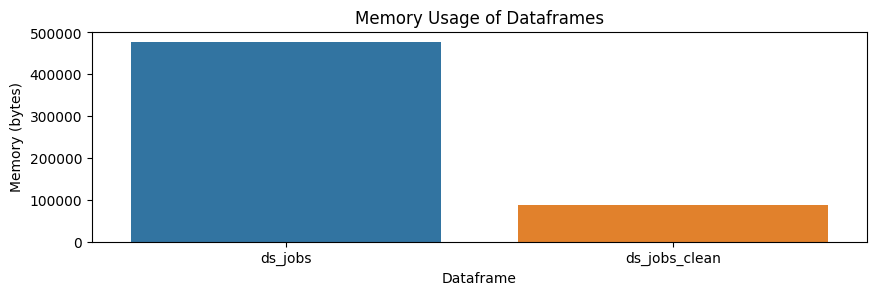

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Measure memory usage of the dataframes
ds_jobs_memory = sys.getsizeof(ds_jobs)
ds_jobs_clean_memory = sys.getsizeof(ds_jobs_clean)


# Create a bar plot to compare memory usage of the dataframes
df_memory = pd.DataFrame({
    'Dataframe': ['ds_jobs', 'ds_jobs_clean'],
    'Memory Usage': [ds_jobs_memory, ds_jobs_clean_memory],
})

plt.figure(figsize=(10, 6))

# Plot memory usage
plt.subplot(2, 1, 1)
sns.barplot(x='Dataframe', y='Memory Usage', data=df_memory)
plt.title('Memory Usage of Dataframes')
plt.ylabel('Memory (bytes)')



In [35]:
# Calculate the percentage difference in memory usage
percent_diff_memory = ((ds_jobs_clean_memory - ds_jobs_memory) / ds_jobs_memory) * 100

print(f"The percentage difference in memory usage between ds_jobs_clean and ds_jobs is: {percent_diff_memory:.2f}%")


The percentage difference in memory usage between ds_jobs_clean and ds_jobs is: -81.53%


Optimizing computer resources, particularly memory usage, when handling dataframes is crucial for efficient data processing, especially with large datasets. In the case where the clean dataframe (ds_jobs_clean) occupies 81.53% less memory compared to the standard dataframe (ds_jobs), it emphasizes the significance of resource optimization. This reduction in memory usage implies several key benefits:

Improved Performance: Reduced memory consumption often leads to enhanced performance in terms of speed and efficiency during data processing operations like filtering, sorting, and analysis.

Cost Savings: Lower memory usage can translate to cost savings, especially in cloud computing environments where memory allocation impacts overall expenses.

Scalability: Optimizing memory usage allows for better scalability, enabling the handling of larger datasets without exceeding memory limitations.

Resource Allocation: Efficient memory management allows for better allocation of computational resources, potentially enabling parallel processing or accommodating multiple simultaneous tasks.

Reduced System Overhead: Lower memory usage minimizes the strain on system resources, reducing the chances of system crashes, slowdowns, or interruptions during data operations.

In conclusion, optimizing memory usage significantly impacts the performance, cost, and scalability of data processing operations. It is essential to prioritize memory optimization techniques, such as data cleaning, data type conversions, and efficient storage methods, to ensure optimal resource utilization and improved data processing capabilities.